In [2]:
import pandas as pd
import numpy as np



In [15]:
df = pd.read_csv("df_with_average_roughness_levelled.csv")

In [16]:
df.head()

,Unnamed: 0,part,rib,sur,filename,x,y,x_y_angle,z_angle,sq_x,sq_y,sq_2d,NaN_total(%),NaN_std_x(%),NaN_std_y(%),param_a,param_b,param_c,length,Average Roughness (Ra)
0,1,1,1,1,STV1 Rib 1 Surf 1 subset-t.x3p,-75,75,0,165,0.000014,0.000011,0.000016,1.388286,71.647249,132.923468,0.000357,-1.201282e-09,1.313680e-09,8001,0.000012
1,2,1,1,2,STV1 Rib 1 Surf 2 subset-t.x3p,-75,75,0,150,0.000012,0.000011,0.000014,1.587930,84.101561,147.786789,0.000050,-6.255237e-09,-4.266600e-10,8001,0.000010
2,3,1,1,3,STV1 Rib 1 Surf 3 subset-t.x3p,-75,75,0,135,0.000012,0.000011,0.000013,1.108428,87.285990,245.836803,-0.002069,-9.197907e-09,3.351420e-10,8001,0.000010
3,4,1,1,4,STV1 Rib 1 Surf 4 subset-t.x3p,-75,75,0,120,0.000010,0.000010,0.000011,1.043942,99.837943,240.654891,-0.005262,-9.547617e-09,-2.045991e-10,8001,0.000008
4,5,1,1,5,STV1 Rib 1 Surf 5 subset-t.x3p,-75,75,0,105,0.000010,0.000009,0.000010,0.555917,131.519475,227.699638,-0.009890,-6.707171e-09,5.883585e-10,8001,0.000007


In [17]:
selected_columns_laser_angle = ["part","rib","sur","x", "y", "x_y_angle", "z_angle","Average Roughness (Ra)", "sq_2d"]
df_selected_laser_angle = df[selected_columns_laser_angle]
df_selected_laser_angle.head()

,part,rib,sur,x,y,x_y_angle,z_angle,Average Roughness (Ra),sq_2d
0,1,1,1,-75,75,0,165,0.000012,0.000016
1,1,1,2,-75,75,0,150,0.000010,0.000014
2,1,1,3,-75,75,0,135,0.000010,0.000013
3,1,1,4,-75,75,0,120,0.000008,0.000011
4,1,1,5,-75,75,0,105,0.000007,0.000010


In [18]:
# Constants
r = 22.59  # radius in mm
h = 474.853  # height in mm

# Converting angles from degrees to radians for computation
df_selected_laser_angle['z_angle_rad'] = np.radians(df_selected_laser_angle['z_angle'])
df_selected_laser_angle['x_y_angle_rad'] = np.radians(df_selected_laser_angle['x_y_angle'])

# Calculate Δx and Δy
df_selected_laser_angle['Δx'] = df_selected_laser_angle['x'] + r * np.cos(df_selected_laser_angle['x_y_angle_rad']) * np.sin(df_selected_laser_angle['z_angle_rad'])
df_selected_laser_angle['Δy'] = df_selected_laser_angle['y'] + r * np.sin(df_selected_laser_angle['x_y_angle_rad']) * np.sin(df_selected_laser_angle['z_angle_rad'])

# Calculate χ and ψ
df_selected_laser_angle['χ'] = np.arctan2(df_selected_laser_angle['Δy'], df_selected_laser_angle['Δx'])  # arctan2 handles full 360 degree range correctly
df_selected_laser_angle['ψ'] = np.arctan(np.sqrt(df_selected_laser_angle['Δx']**2 + df_selected_laser_angle['Δy']**2) / h)

# Calculate the laser angle ζ
df_selected_laser_angle['ζ'] = np.arccos(
    np.cos(df_selected_laser_angle['z_angle_rad']) * np.cos(df_selected_laser_angle['ψ']) +
    np.sin(df_selected_laser_angle['z_angle_rad']) * np.sin(df_selected_laser_angle['ψ']) * np.cos(df_selected_laser_angle['x_y_angle_rad'] - df_selected_laser_angle['χ'])
)

# Convert ζ back to degrees for readability
df_selected_laser_angle['laser_relation_angle'] = np.degrees(df_selected_laser_angle['ζ'])
df_selected_laser_angle.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_81379/2971243501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_laser_angle['z_angle_rad'] = np.radians(df_selected_laser_angle['z_angle'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_81379/2971243501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_laser_angle['x_y_angle_rad'] = np.radians(df_selected_laser_angle['x_y_angle'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_81379/2971243501.

,part,rib,sur,x,y,x_y_angle,z_angle,Average Roughness (Ra),sq_2d,z_angle_rad,x_y_angle_rad,Δx,Δy,χ,ψ,ζ,laser_relation_angle
0,1,1,1,-75,75,0,165,0.000012,0.000016,2.879793,0.0,-69.153278,75.0,2.315658,0.211619,2.947532,168.881130
1,1,1,2,-75,75,0,150,0.000010,0.000014,2.617994,0.0,-63.705000,75.0,2.274942,0.204338,2.723072,156.020558
2,1,1,3,-75,75,0,135,0.000010,0.000013,2.356194,0.0,-59.026458,75.0,2.237572,0.198349,2.464529,141.207134
3,1,1,4,-75,75,0,120,0.000008,0.000011,2.094395,0.0,-55.436486,75.0,2.207319,0.193938,2.201651,126.145285
4,1,1,5,-75,75,0,105,0.000007,0.000010,1.832596,0.0,-53.179736,75.0,2.187579,0.191253,1.939390,111.118839


In [19]:
selected_columns = ["part","rib","sur","x", "y", "x_y_angle", "z_angle",'laser_relation_angle',"Average Roughness (Ra)", "sq_2d"]
df_selected = df_selected_laser_angle[selected_columns]

In [20]:
import numpy as np

# Convert angles to radians
df_selected['x_y_angle_rad'] = np.radians(df_selected['x_y_angle'])
 
# Compute sine and cosine transformations
df_selected['x_y_angle_sin'] = np.sin(df_selected['x_y_angle_rad'])
df_selected['x_y_angle_cos'] = np.cos(df_selected['x_y_angle_rad'])

# Drop the temporary radian columns
df_selected = df_selected.drop(columns=['x_y_angle_rad',"x_y_angle"])

# df_selected['sq_x_mm'] = df_selected["sq_x"]*1e6
# df_selected['sq_y_mm'] = df_selected["sq_y"]*1e6
df_selected['sq_2d_mm'] = df_selected["sq_2d"]*1e6
df_selected['Average Roughness (Ra)'] = df_selected["Average Roughness (Ra)"]*1e6

df_selected = df_selected.drop(columns=['sq_2d'])

df_selected.head()

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_81379/1094681871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['x_y_angle_rad'] = np.radians(df_selected['x_y_angle'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_81379/1094681871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['x_y_angle_sin'] = np.sin(df_selected['x_y_angle_rad'])
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_81379/1094681871.py:8: SettingWithCopyWarning: 
A value is tr

,part,rib,sur,x,y,z_angle,laser_relation_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm
0,1,1,1,-75,75,165,168.881130,11.725713,0.0,1.0,16.331449
1,1,1,2,-75,75,150,156.020558,10.182259,0.0,1.0,13.834006
2,1,1,3,-75,75,135,141.207134,9.506746,0.0,1.0,13.309392
3,1,1,4,-75,75,120,126.145285,7.749450,0.0,1.0,10.536805
4,1,1,5,-75,75,105,111.118839,7.474203,0.0,1.0,10.356003


In [21]:
df_selected['difference_z_laser'] = df_selected['laser_relation_angle'] - df_selected['z_angle']

# Drop the original laser_relation_angle column if you no longer need it
df_selected.drop(columns=['laser_relation_angle'], inplace=True)

# Display the updated DataFrame
df_selected.head()

,part,rib,sur,x,y,z_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm,difference_z_laser
0,1,1,1,-75,75,165,11.725713,0.0,1.0,16.331449,3.881130
1,1,1,2,-75,75,150,10.182259,0.0,1.0,13.834006,6.020558
2,1,1,3,-75,75,135,9.506746,0.0,1.0,13.309392,6.207134
3,1,1,4,-75,75,120,7.749450,0.0,1.0,10.536805,6.145285
4,1,1,5,-75,75,105,7.474203,0.0,1.0,10.356003,6.118839


In [3]:
df_selected.head(100)

NameError: name 'df_selected' is not defined

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
cols_to_scale = ['Average Roughness (Ra)', 'sq_2d_mm']

# Fit and transform the data
df_selected[cols_to_scale] = scaler.fit_transform(df_selected[cols_to_scale])

df_selected.head()


,part,rib,sur,x,y,z_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm,difference_z_laser
0,1,1,1,-75,75,165,0.154495,0.0,1.0,0.156342,3.881130
1,1,1,2,-75,75,150,0.116213,0.0,1.0,0.112335,6.020558
2,1,1,3,-75,75,135,0.099458,0.0,1.0,0.103091,6.207134
3,1,1,4,-75,75,120,0.055871,0.0,1.0,0.054235,6.145285
4,1,1,5,-75,75,105,0.049044,0.0,1.0,0.051049,6.118839


In [9]:
df_selected['Average Roughness (Ra)'].max()

45.81420003883699

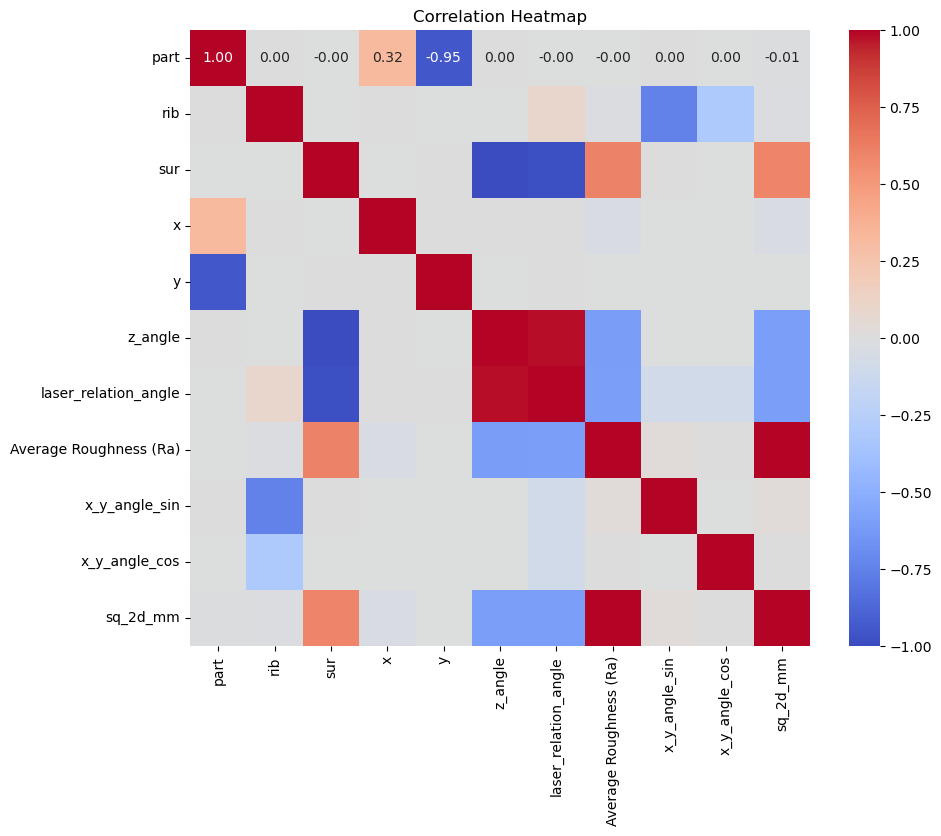

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the Pearson correlation coefficients
correlation_matrix = df_selected.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df_test = df_selected[(df_selected['part'] == 9) & (df_selected['z_angle'] == 60)]
df_selected = df_selected.drop(df_test.index)


In [12]:
df_test

,part,rib,sur,x,y,z_angle,laser_relation_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm
583,9,1,8,75,-75,60,58.975655,18.379629,0.000000e+00,1.000000e+00,23.831882
592,9,2,8,75,-75,60,59.814550,33.014524,7.071068e-01,7.071068e-01,39.991186
601,9,3,8,75,-75,60,60.887461,27.507330,1.000000e+00,6.123234e-17,38.059197
610,9,4,8,75,-75,60,60.000000,37.755705,7.071068e-01,-7.071068e-01,49.327379
619,9,5,8,75,-75,60,59.123409,34.933846,1.224647e-16,-1.000000e+00,46.584238
628,9,6,8,75,-75,60,60.222428,37.601201,-7.071068e-01,-7.071068e-01,47.955341
637,9,7,8,75,-75,60,61.032398,35.096878,-1.000000e+00,-1.836970e-16,46.045218
646,9,8,8,75,-75,60,60.000000,34.031990,-7.071068e-01,7.071068e-01,42.103473


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','difference_z_laser']]
y = df_selected['Average Roughness (Ra)']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

part_list = df_selected['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current part
    results[part] = {
        'RMSE': np.sqrt(mse_gb),
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each part
for part in results:
    print(f"Part {part}: RMSE = {results[part]['RMSE']:.20f}, R^2 = {results[part]['R2']:.3f}")


Part 1: RMSE = 0.05719558146650903507, R^2 = 0.958
Part 2: RMSE = 0.06102352909448972157, R^2 = 0.951
Part 3: RMSE = 0.06827958424860694486, R^2 = 0.933
Part 4: RMSE = 0.03715804918086373226, R^2 = 0.984
Part 5: RMSE = 0.03301493849922446794, R^2 = 0.987
Part 6: RMSE = 0.05187701394835995267, R^2 = 0.963
Part 7: RMSE = 0.04355461475207030725, R^2 = 0.979
Part 8: RMSE = 0.04419997501943781493, R^2 = 0.978
Part 9: RMSE = 0.07098265395958414103, R^2 = 0.936


In [14]:
# Assuming gb_model is your pre-trained GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor

# Features for the model
X_new = df_test[['x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']]

predictions = []

for i in range(len(X_new)):
    # Predict and collect the prediction
    prediction = gb_model.predict(X_new.iloc[[i]])
    predictions.append(prediction[0])  # Assuming predict returns an array, take the first element

# It's recommended to work on a copy to avoid SettingWithCopyWarning
df_test_copy = df_test.copy()

# Adding predictions to the DataFrame for demonstration
df_test_copy['Predicted Average Roughness (Ra)'] = predictions

# Display the desired columns
df_test_copy[['part', 'rib', 'sur', 'Average Roughness (Ra)', 'Predicted Average Roughness (Ra)']]


,part,rib,sur,Average Roughness (Ra),Predicted Average Roughness (Ra)
583,9,1,8,18.379629,37.657016
592,9,2,8,33.014524,36.851062
601,9,3,8,27.507330,34.701178
610,9,4,8,37.755705,36.265917
619,9,5,8,34.933846,29.413154
628,9,6,8,37.601201,33.984503
637,9,7,8,35.096878,31.903094
646,9,8,8,34.031990,33.661524


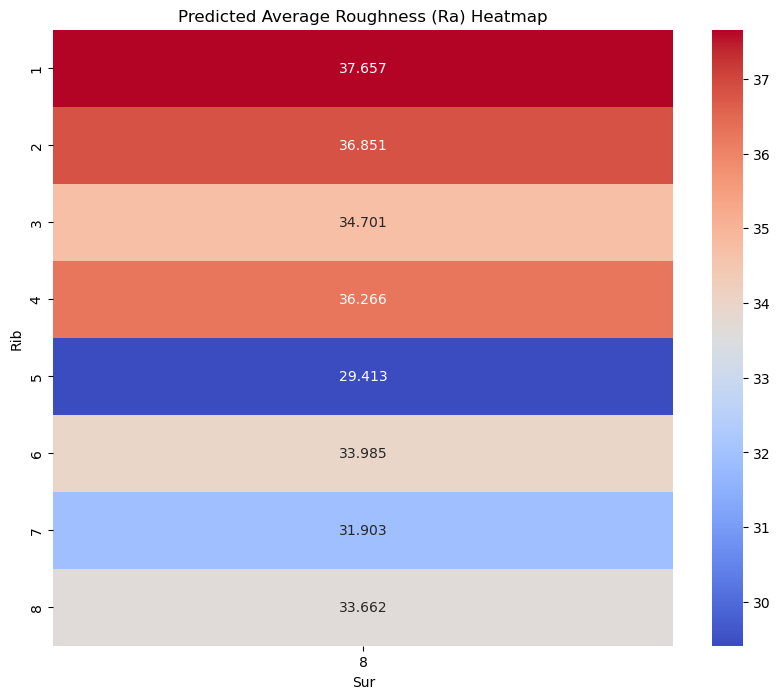

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Pivoting the data for the heatmap
# Corrected pivot call with keyword arguments
heatmap_data = df_test_copy.pivot(index='rib', columns='sur', values='Predicted Average Roughness (Ra)')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm")
plt.title('Predicted Average Roughness (Ra) Heatmap')
plt.ylabel('Rib')
plt.xlabel('Sur')
plt.show()


In [16]:
df_test_copy

,part,rib,sur,x,y,z_angle,laser_relation_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm,Predicted Average Roughness (Ra)
583,9,1,8,75,-75,60,58.975655,18.379629,0.000000e+00,1.000000e+00,23.831882,37.657016
592,9,2,8,75,-75,60,59.814550,33.014524,7.071068e-01,7.071068e-01,39.991186,36.851062
601,9,3,8,75,-75,60,60.887461,27.507330,1.000000e+00,6.123234e-17,38.059197,34.701178
610,9,4,8,75,-75,60,60.000000,37.755705,7.071068e-01,-7.071068e-01,49.327379,36.265917
619,9,5,8,75,-75,60,59.123409,34.933846,1.224647e-16,-1.000000e+00,46.584238,29.413154
628,9,6,8,75,-75,60,60.222428,37.601201,-7.071068e-01,-7.071068e-01,47.955341,33.984503
637,9,7,8,75,-75,60,61.032398,35.096878,-1.000000e+00,-1.836970e-16,46.045218,31.903094
646,9,8,8,75,-75,60,60.000000,34.031990,-7.071068e-01,7.071068e-01,42.103473,33.661524


POSITIONAL DEPENDENCE OF THE AVERAGE ROUGHNESS

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x_range = [-100, 100] 
_y_range = [-100, 100]
num = 5
xs = np.linspace(*x_range, num=num)
ys = np.linspace(*_y_range, num=num)
_xs, _ys = np.meshgrid(xs, ys)
_xs = _xs.flatten()
_ys = _ys.flatten()
ftrs = ['x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']

for x_y_angle in df.x_y_angle.unique():
    for z_angle in [45]: 

        df_dict = {
            'x': _xs,
            'y': _ys,
            'x_y_angle_sin': np.sin(x_y_angle*np.pi/180)*np.ones(num**2),
            'x_y_angle_cos': np.cos(x_y_angle*np.pi/180)*np.ones(num**2),
            'z_angle': z_angle * np.ones(num**2),
            'laser_relation_angle': laser_relation_angle * np.ones(num**2)
                  }
        _X = pd.DataFrame.from_dict(df_dict)
        _X = _X[ftrs]
        srs_pred = gb_model.predict(_X)
       

        X_new = np.array(_xs).reshape((num, num))
        Y = np.array(_ys).reshape((num, num))
        Z = np.array(srs_pred).reshape((num, num))
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)
        cp = ax.contourf(X_new, Y, Z, levels=20, cmap='Reds')
        cbar = fig.colorbar(cp,label="Average roughness (µm)")

        ax.set_title(f'x_y_angle: {x_y_angle:d} deg; z angle: {z_angle:d} deg')
        ax.set_xlabel('x position [mm]')
        ax.set_xlim(x_range)
        ax.set_ylim(_y_range)
        ax.set_ylabel('y position [mm]')
        ax.set_aspect('auto')
        plt.show()


NameError: name 'laser_relation_angle' is not defined

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and gb_model are defined earlier in your code
# and df contains 'x_y_angle' column and gb_model is your trained model

x_range = [-100, 100]
_y_range = [-100, 100]
num = 5
xs = np.linspace(*x_range, num=num)
ys = np.linspace(*_y_range, num=num)
_xs, _ys = np.meshgrid(xs, ys)
_xs = _xs.flatten()
_ys = _ys.flatten()
ftrs = ['x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']

for x_y_angle in df.x_y_angle.unique():
    for z_angle in [45]:

        df_dict = {
            'x': _xs,
            'y': _ys,
            'x_y_angle_sin': np.sin(x_y_angle*np.pi/180)*np.ones(num**2),
            'x_y_angle_cos': np.cos(x_y_angle*np.pi/180)*np.ones(num**2),
            'z_angle': z_angle * np.ones(num**2),
            'laser_relation_angle': laser_relation_angle * np.ones(num**2)
        }
        _X = pd.DataFrame.from_dict(df_dict)
        _X = _X[ftrs]
        srs_pred = gb_model.predict(_X)

        # Normalize your predictions to be within [0, 1] if not already
        # This step is crucial to ensure the color bar represents your intended range
        srs_pred_normalized = np.clip(srs_pred, 0, 1)  # Ensuring values are within [0, 1]

        X_new = np.array(_xs).reshape((num, num))
        Y = np.array(_ys).reshape((num, num))
        Z = np.array(srs_pred_normalized).reshape((num, num))  # Use normalized predictions here
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)

        # Define levels from 0 to 1 for the contour plot
        levels = np.linspace(0, 1, 21)  # 21 levels from 0 to 1, including both

        cp = ax.contourf(X_new, Y, Z, levels=levels, cmap='Reds')
        cbar = fig.colorbar(cp, label="Average roughness (µm)")

        ax.set_title(f'x_y_angle: {x_y_angle:d} deg; z angle: {z_angle:d} deg')
        ax.set_xlabel('x position [mm]')
        ax.set_xlim(x_range)
        ax.set_ylim(_y_range)
        ax.set_ylabel('y position [mm]')
        ax.set_aspect('auto')
        plt.show()


NameError: name 'laser_relation_angle' is not defined

ANGULAR DEPENDENCE OF THE AVERAGE ROUGHNESS

In [19]:
for x in [-75, 0, 75]:
    for _y in [-75, 0, 75]:
    
        num = 10
        x_y_angle_range = [0 ,360]
        z_angle_range = [45, 165]
        x_y_angles = np.linspace(*x_y_angle_range, num=num)
        z_angles = np.linspace(*z_angle_range, num=num)
        _x_ys, _zs = np.meshgrid(x_y_angles, z_angles)
        _x_ys = _x_ys.flatten()
        _zs = _zs.flatten()

        df_dict = {
            'x': x*np.ones(num**2),
            'y': _y*np.ones(num**2),
            'x_y_angle_sin': np.sin(_x_ys*np.pi/180),
            'x_y_angle_cos': np.cos(_x_ys*np.pi/180),
            'z_angle': _zs
                  }
        print(len(_x_ys), len(_zs))
        _X = pd.DataFrame.from_dict(df_dict)
        _X = _X[ftrs]
        srs_pred = gb_model.predict(_X)

        X_new = np.array(_x_ys).reshape((num, num))
        Y = np.array(_zs).reshape((num, num))
        Z = np.array(srs_pred).reshape((num, num))
        fig,ax=plt.subplots(1,1, figsize=(5,5), dpi=150)
        cp = ax.contourf(X_new, Y, Z, levels=20, cmap='jet')
        cbar = fig.colorbar(cp,label="Average roughness (µm)")

        ax.set_title(f'x position: {x:d}; y position: {_y:d}')
        ax.set_xlabel('x-y angle (deg)')
        ax.set_xlim(x_y_angle_range)
        ax.set_ylim(z_angle_range)
        ax.set_ylabel('z angle (deg)')
        ax.set_aspect('auto')
        plt.show()

100 100


KeyError: "['laser_relation_angle'] not in index"

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']]
y = df_selected['Average Roughness (Ra)']

# Initialize the Linear Regression model
lr_model = LinearRegression()

part_list = df_selected['part'].unique()

results = {}

for part in part_list:
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    lr_model.fit(X_train, y_train)
    
    y_pred_lr = lr_model.predict(X_test)
    
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    
    residuals = y_test - y_pred_lr

    results[part] = {
        'RMSE': np.sqrt(mse_lr),
        'R2': r2_lr,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_lr.tolist(),
        'Residuals': residuals.tolist()
    }

for part in results:
    print(f"Part {part}: RMSE = {results[part]['RMSE']:.20f}, R^2 = {results[part]['R2']:.3f}")


Part 1: RMSE = 8.61977591523436181831, R^2 = 0.413
Part 2: RMSE = 8.77361960801946061395, R^2 = 0.381
Part 3: RMSE = 8.47778607542103834760, R^2 = 0.368
Part 4: RMSE = 9.36245627064854701871, R^2 = 0.382
Part 5: RMSE = 9.21175186375226040525, R^2 = 0.379
Part 6: RMSE = 8.81430236788565224515, R^2 = 0.335
Part 7: RMSE = 9.64189361572011804924, R^2 = 0.355
Part 8: RMSE = 9.74244276965852584738, R^2 = 0.333
Part 9: RMSE = 9.24579778927885165274, R^2 = 0.144


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']]
y = df_selected['Average Roughness (Ra)']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

part_list = df_selected['part'].unique()

results = {}

for part in part_list:
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    rf_model.fit(X_train, y_train)
    
    y_pred_rf = rf_model.predict(X_test)
    
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    residuals = y_test - y_pred_rf

    results[part] = {
        'RMSE': np.sqrt(mse_rf),
        'R2': r2_rf,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_rf.tolist(),
        'Residuals': residuals.tolist()
    }

for part in results:
    print(f"Part {part}: RMSE = {results[part]['RMSE']:.20f}, R^2 = {results[part]['R2']:.3f}")


Part 1: RMSE = 2.23765325919639801455, R^2 = 0.960
Part 2: RMSE = 2.25094385752192982508, R^2 = 0.959
Part 3: RMSE = 2.19770777619521284763, R^2 = 0.958
Part 4: RMSE = 1.29851021175062797397, R^2 = 0.988
Part 5: RMSE = 1.34590142359437514585, R^2 = 0.987
Part 6: RMSE = 2.71703931614093496805, R^2 = 0.937
Part 7: RMSE = 2.00074658714326547582, R^2 = 0.972
Part 8: RMSE = 1.47060609295860644785, R^2 = 0.985
Part 9: RMSE = 1.60022157934675401947, R^2 = 0.974


To compare the results between the two targets—average roughness and standard deviation (std) 2d—across the nine parts, we'll look at both the Root Mean Square Error (RMSE) and the R-squared (R^2) values. The RMSE measures the average magnitude of the errors between predicted values and observed values, where lower values indicate better fit. The R^2 value represents the proportion of the variance for the dependent variable that's predicted from the independent variable(s), with values closer to 1 indicating a better fit.

Here's a comparison of the two targets:

- **Part 1:** 
  - Average roughness: RMSE = 0.0556, R^2 = 0.960
  - Std 2d: RMSE = 0.0507, R^2 = 0.957
  - **Observation:** Std 2d has a lower RMSE, indicating a slightly better model fit, but average roughness has a higher R^2, suggesting it explains a slightly higher variance of the target variable.

- **Part 2:**
  - Average roughness: RMSE = 0.0575, R^2 = 0.957
  - Std 2d: RMSE = 0.0515, R^2 = 0.955
  - **Observation:** Similar to Part 1, Std 2d shows a lower RMSE. However, the R^2 values are very close, with average roughness slightly ahead.

- **Part 3:** 
  - Average roughness: RMSE = 0.0603, R^2 = 0.948
  - Std 2d: RMSE = 0.0550, R^2 = 0.943
  - **Observation:** Std 2d shows better RMSE values again, but both targets show similar performance in terms of R^2.

- **Part 4:** 
  - Average roughness: RMSE = 0.0312, R^2 = 0.989
  - Std 2d: RMSE = 0.0339, R^2 = 0.982
  - **Observation:** Average roughness outperforms Std 2d significantly in both metrics, indicating a much better model fit for this part.

- **Part 5:** 
  - Average roughness: RMSE = 0.0353, R^2 = 0.985
  - Std 2d: RMSE = 0.0315, R^2 = 0.984
  - **Observation:** While Std 2d has a lower RMSE, the R^2 values are almost identical, showing close performance.

- **Part 6:** 
  - Average roughness: RMSE = 0.0512, R^2 = 0.964
  - Std 2d: RMSE = 0.0390, R^2 = 0.972
  - **Observation:** Std 2d shows better performance in both RMSE and R^2, indicating a better fit.

- **Part 7:** 
  - Average roughness: RMSE = 0.0392, R^2 = 0.983
  - Std 2d: RMSE = 0.0368, R^2 = 0.979
  - **Observation:** Std 2d has a lower RMSE, but average roughness has a higher R^2, suggesting a mixed performance.

- **Part 8:** 
  - Average roughness: RMSE = 0.0377, R^2 = 0.984
  - Std 2d: RMSE = 0.0440, R^2 = 0.972
  - **Observation:** Average roughness outperforms Std 2d in both metrics, showing better model accuracy and fit.

- **Part 9:** 
  - Average roughness: RMSE = 0.0633, R^2 = 0.949
  - Std 2d: RMSE = 0.0575, R^2 = 0.946
  - **Observation:** While Std 2d has a lower RMSE, indicating better accuracy, the R^2 values are very close, suggesting similar performance in explaining variance.

**Overall**, the model's performance varies depending on the target variable and the specific part of the dataset being analyzed. In general, Std 2d tends to have lower RMSE values, indicating better predictive accuracy in several parts, while average roughness sometimes shows a higher R^2, suggesting it might explain a slightly higher variance of the target variable in those cases. The choice between these two as a better model performance metric depends on whether accuracy (RMSE) or variance explanation (R^2) is more important for the specific application or research question.

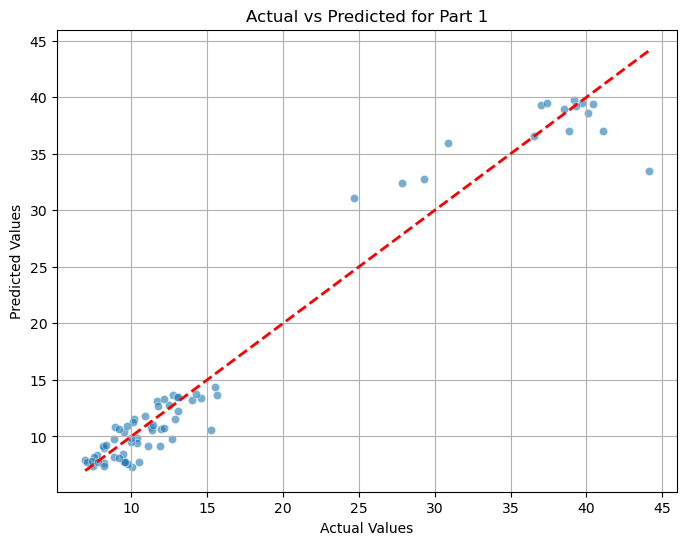

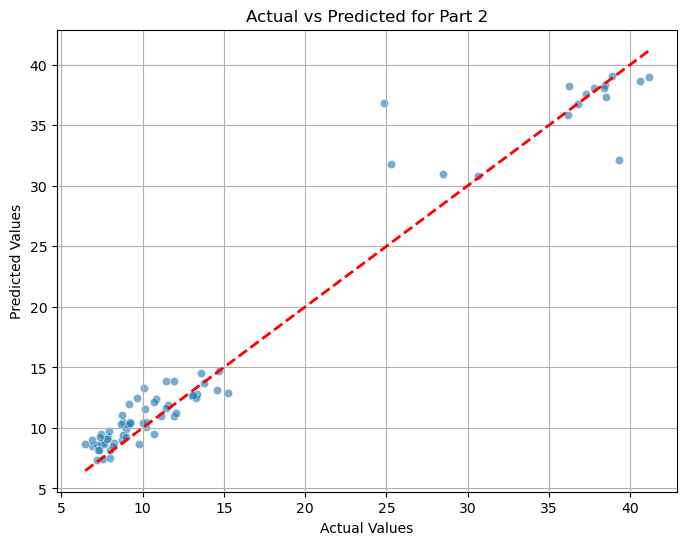

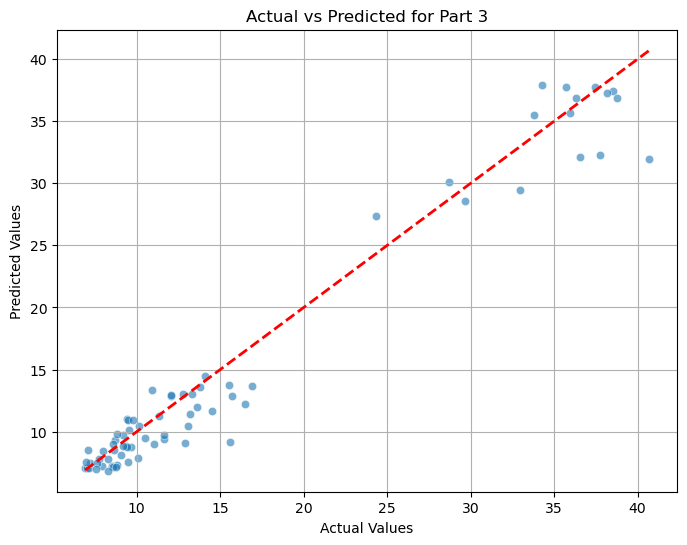

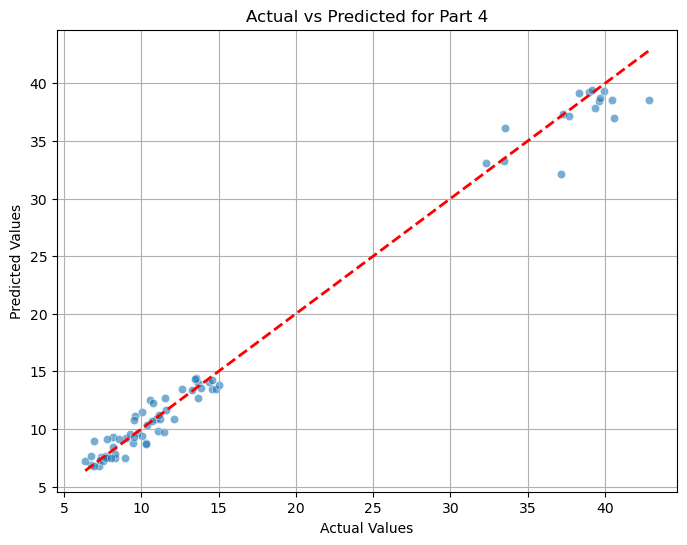

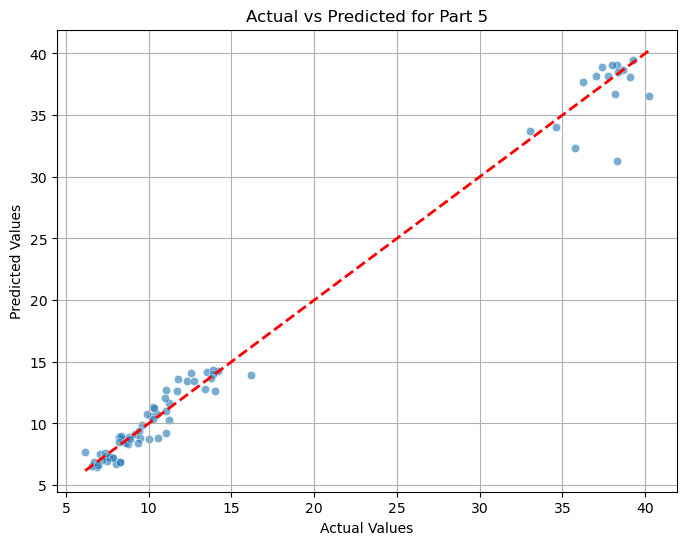

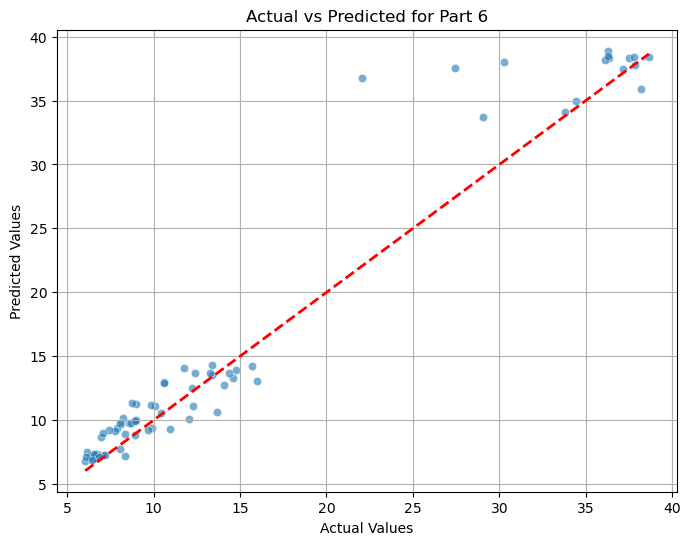

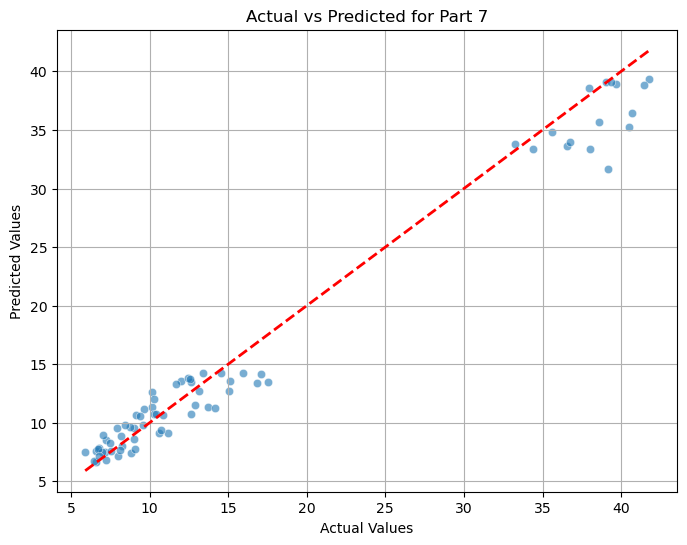

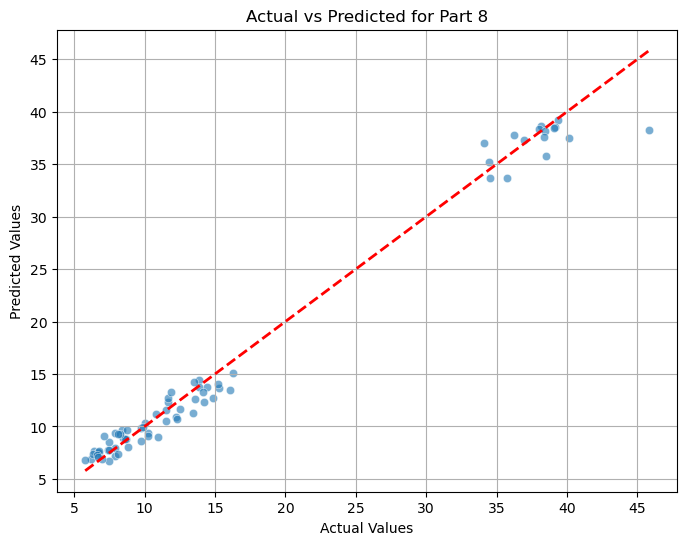

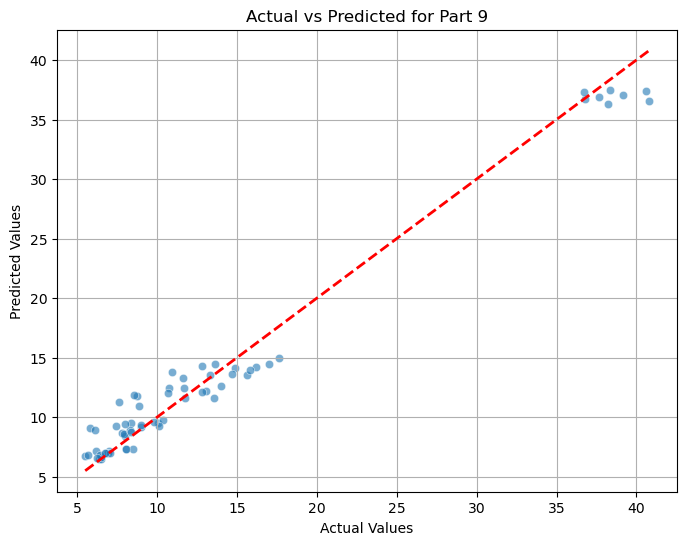

In [22]:
# Plotting actual vs predicted values for each part
for part in results:
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Part {part}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

In [23]:
# Find the index of the largest residual for each part
largest_residual_indices = {}

for part in results:
    residuals = np.array(results[part]['Residuals'])
    largest_residual_index = np.argmax(np.abs(residuals))
    largest_residual_indices[part] = largest_residual_index

# Using the above index, retrieve the corresponding data row
for part in results:
    index = largest_residual_indices[part]
    outlier_row = df_selected[X['part'] == part].iloc[index]
    print(f"Outlier for Part {part}:")
    print(outlier_row)
    print('-'*50)

Outlier for Part 1:
part                      1.000000e+00
rib                       3.000000e+00
sur                       8.000000e+00
x                        -7.500000e+01
y                         7.500000e+01
z_angle                   6.000000e+01
laser_relation_angle      5.897566e+01
Average Roughness (Ra)    4.411943e+01
x_y_angle_sin             1.000000e+00
x_y_angle_cos             6.123234e-17
sq_2d_mm                  5.732457e+01
Name: 25, dtype: float64
--------------------------------------------------
Outlier for Part 2:
part                      2.000000e+00
rib                       3.000000e+00
sur                       8.000000e+00
x                         0.000000e+00
y                         7.500000e+01
z_angle                   6.000000e+01
laser_relation_angle      4.970005e+01
Average Roughness (Ra)    2.485028e+01
x_y_angle_sin             1.000000e+00
x_y_angle_cos             6.123234e-17
sq_2d_mm                  3.359272e+01
Name: 97, dtype: float64
-

In [24]:
import pandas as pd

# Assuming df_selected is your original DataFrame
# and the previous code for Gradient Boosting Regressor has been executed

# Initialize an empty list to store residuals
residuals_Ra = []

# Loop through each unique part, calculate residuals, and append them to the residuals_y list
for part in part_list:
    # Retrieve actual and predicted values
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']
    
    # Calculate residuals for the current part
    residuals_current_part = np.array(actual_values) - np.array(predicted_values)
    
    # Append residuals to the residuals_x list
    residuals_Ra.extend(residuals_current_part)

# Add the residuals as a new column in the original DataFrame
df_selected['residuals_Ra'] = residuals_Ra

# Now, df_selected contains a new column 'residuals_x' with the residuals of the 'sq_y_mm' predictions
df_selected

,part,rib,sur,x,y,z_angle,laser_relation_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm,residuals_Ra
0,1,1,1,-75,75,165,162.845976,11.725713,0.000000,1.000000,16.331449,-1.450994
1,1,1,2,-75,75,150,148.121015,10.182259,0.000000,1.000000,13.834006,-1.357720
2,1,1,3,-75,75,135,133.500747,9.506746,0.000000,1.000000,13.309392,-0.889619
3,1,1,4,-75,75,120,118.967602,7.749450,0.000000,1.000000,10.536805,-0.610562
4,1,1,5,-75,75,105,104.482305,7.474203,0.000000,1.000000,10.356003,0.067371
...,...,...,...,...,...,...,...,...,...,...,...,...
642,9,8,4,75,-75,120,120.000000,7.998799,-0.707107,0.707107,10.363565,-1.431183
643,9,8,5,75,-75,105,105.000000,6.736954,-0.707107,0.707107,8.839090,-0.249608
644,9,8,6,75,-75,90,90.000000,6.226713,-0.707107,0.707107,8.352485,-0.323651
645,9,8,7,75,-75,75,75.000000,8.338179,-0.707107,0.707107,10.846057,-0.436263


In [25]:
df_selected.loc[df_selected["z_angle"]==120]

,part,rib,sur,x,y,z_angle,laser_relation_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm,residuals_Ra
3,1,1,4,-75,75,120,118.967602,7.749450,0.000000e+00,1.000000e+00,10.536805,-0.610562
12,1,2,4,-75,75,120,119.777572,9.465747,7.071068e-01,7.071068e-01,14.075430,1.004026
21,1,3,4,-75,75,120,120.876591,8.194903,1.000000e+00,6.123234e-17,11.452893,-0.742697
30,1,4,4,-75,75,120,120.000000,8.121663,7.071068e-01,-7.071068e-01,10.988368,-1.062486
39,1,5,4,-75,75,120,119.112539,10.354446,1.224647e-16,-1.000000e+00,13.297388,0.967204
...,...,...,...,...,...,...,...,...,...,...,...,...
606,9,4,4,75,-75,120,120.000000,9.004347,7.071068e-01,-7.071068e-01,11.441519,-0.175389
615,9,5,4,75,-75,120,121.024345,7.409082,1.224647e-16,-1.000000e+00,9.599107,-1.863372
624,9,6,4,75,-75,120,120.185450,5.790511,-7.071068e-01,-7.071068e-01,7.723617,-3.263159
633,9,7,4,75,-75,120,119.112539,6.117425,-1.000000e+00,-1.836970e-16,8.048778,-2.775701


/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/raj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


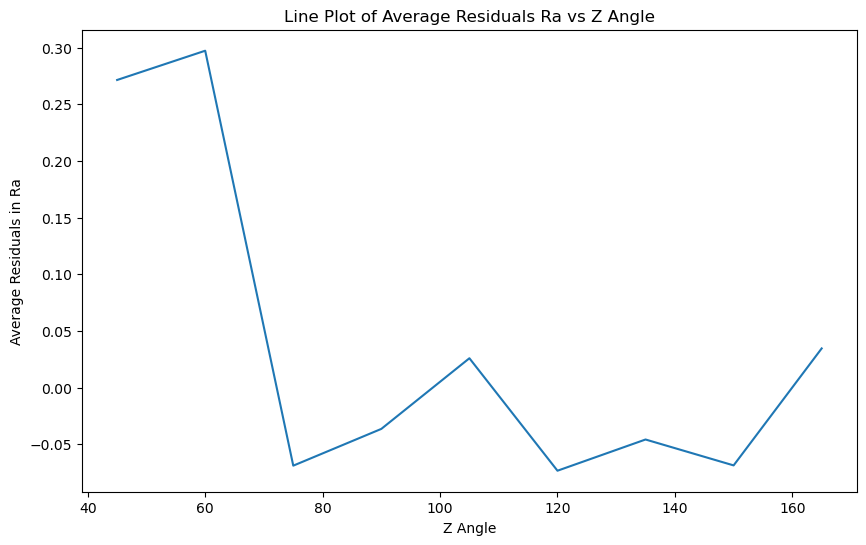

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df_grouped = df_selected.groupby('z_angle')['residuals_Ra'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="z_angle", y="residuals_Ra")
plt.title("Line Plot of Average Residuals Ra vs Z Angle")
plt.xlabel("Z Angle")
plt.ylabel("Average Residuals in Ra")
plt.show()


In [27]:
all_residuals = []
for part in results:
    part_data = df_selected[df_selected['part'] == part]
    residuals = results[part]['Residuals']
    part_data['Residual'] = residuals
    all_residuals.append(part_data)

df_with_residuals = pd.concat(all_residuals)

Q1 = df_with_residuals['Residual'].quantile(0.25)
Q3 = df_with_residuals['Residual'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_with_residuals['Residual'] < (Q1 - 1.5 * IQR)) | (df_with_residuals['Residual'] > (Q3 + 1.5 * IQR))
df_cleaned = df_with_residuals[~outlier_mask]

/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_61771/687776428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Residual'] = residuals
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_61771/687776428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Residual'] = residuals
/var/folders/g5/r3br8jz97s7c_z6lj7l3b2540000gn/T/ipykernel_61771/687776428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [28]:
outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
642    False
643    False
644    False
645    False
647    False
Name: Residual, Length: 640, dtype: bool

In [29]:
filtered_df_of_outliers_1 = df_with_residuals[outlier_mask]
filtered_df_of_outliers_1

,part,rib,sur,x,y,z_angle,laser_relation_angle,Average Roughness (Ra),x_y_angle_sin,x_y_angle_cos,sq_2d_mm,residuals_Ra,Residual
15,1,2,7,-75,75,75,74.947417,15.253679,7.071068e-01,7.071068e-01,19.759955,4.714585,4.714585
16,1,2,8,-75,75,60,59.814550,41.077567,7.071068e-01,7.071068e-01,52.389402,4.083420,4.083420
25,1,3,8,-75,75,60,58.975655,44.119428,1.000000e+00,6.123234e-17,57.324568,10.612280,10.612280
43,1,5,8,-75,75,60,61.032398,27.876733,1.224647e-16,-1.000000e+00,37.395688,-4.584206,-4.584206
61,1,7,8,-75,75,60,59.123409,24.688221,-1.000000e+00,-1.836970e-16,31.930096,-6.432542,-6.432542
70,1,8,8,-75,75,60,60.000000,30.912943,-7.071068e-01,7.071068e-01,38.515694,-5.031683,-5.031683
97,2,3,8,0,75,60,49.700049,24.850285,1.000000e+00,6.123234e-17,33.592723,-11.945347,-11.945347
115,2,5,8,0,75,60,59.155569,25.298338,1.224647e-16,-1.000000e+00,32.971476,-6.502506,-6.502506
142,2,8,8,0,75,60,65.775108,39.336612,-7.071068e-01,7.071068e-01,51.273093,7.250152,7.250152
150,3,1,7,75,75,75,62.177402,12.887198,0.000000e+00,1.000000e+00,17.017978,3.837360,3.837360


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','difference_z_laser']]
y = df_selected['sq_2d_mm']

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

part_list = df_selected['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Gradient Boosting Regressor
    gb_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_gb = gb_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Gradient Boosting Regressor
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)
    
    # Calculate residuals
    residuals = y_test - y_pred_gb

    # Store results for the current part
    results[part] = {
        'RMSE': np.sqrt(mse_gb),
        'R2': r2_gb,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_gb.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each part
for part in results:
    print(f"Part {part}: RMSE = {results[part]['RMSE']:.20f}, R^2 = {results[part]['R2']:.3f}")


Part 1: RMSE = 0.05085982692182929032, R^2 = 0.956
Part 2: RMSE = 0.05721341261039318560, R^2 = 0.945
Part 3: RMSE = 0.06309460755385921937, R^2 = 0.925
Part 4: RMSE = 0.03467592194390599347, R^2 = 0.982
Part 5: RMSE = 0.02999462775694560976, R^2 = 0.986
Part 6: RMSE = 0.03974469241703566802, R^2 = 0.971
Part 7: RMSE = 0.03792007849349279813, R^2 = 0.978
Part 8: RMSE = 0.04704911443008034933, R^2 = 0.967
Part 9: RMSE = 0.06501842613221758826, R^2 = 0.931


POSITIONAL DEPENDENCE OF STD 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x_range = [-100, 100] 
_y_range = [-100, 100]
num = 5
xs = np.linspace(*x_range, num=num)
ys = np.linspace(*_y_range, num=num)
_xs, _ys = np.meshgrid(xs, ys)
_xs = _xs.flatten()
_ys = _ys.flatten()
ftrs = ['x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']

for x_y_angle in df.x_y_angle.unique():
    for z_angle in [45]: 

        df_dict = {
            'x': _xs,
            'y': _ys,
            'x_y_angle_sin': np.sin(x_y_angle*np.pi/180)*np.ones(num**2),
            'x_y_angle_cos': np.cos(x_y_angle*np.pi/180)*np.ones(num**2),
            'z_angle': z_angle * np.ones(num**2)
                  }
        _X = pd.DataFrame.from_dict(df_dict)
        _X = _X[ftrs]
        srs_pred = gb_model.predict(_X)
       

        X_new = np.array(_xs).reshape((num, num))
        Y = np.array(_ys).reshape((num, num))
        Z = np.array(srs_pred).reshape((num, num))
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)
        cp = ax.contourf(X_new, Y, Z, levels=20, cmap='Reds')
        cbar = fig.colorbar(cp,label="RMS roughness (µm)")

        ax.set_title(f'x_y_angle: {x_y_angle:d} deg; z angle: {z_angle:d} deg')
        ax.set_xlabel('x position [mm]')
        ax.set_xlim(x_range)
        ax.set_ylim(_y_range)
        ax.set_ylabel('y position [mm]')
        ax.set_aspect('auto')
        plt.show()


KeyError: "['laser_relation_angle'] not in index"

ANGULAR DEPENDENCE OF STD

In [32]:
for x in [-75, 0, 75]:
    for _y in [-75, 0, 75]:
    
        num = 10
        x_y_angle_range = [0 ,360]
        z_angle_range = [45, 165]
        x_y_angles = np.linspace(*x_y_angle_range, num=num)
        z_angles = np.linspace(*z_angle_range, num=num)
        _x_ys, _zs = np.meshgrid(x_y_angles, z_angles)
        _x_ys = _x_ys.flatten()
        _zs = _zs.flatten()

        df_dict = {
            'x': x*np.ones(num**2),
            'y': _y*np.ones(num**2),
            'x_y_angle_sin': np.sin(_x_ys*np.pi/180),
            'x_y_angle_cos': np.cos(_x_ys*np.pi/180),
            'z_angle': _zs
                  }
        print(len(_x_ys), len(_zs))
        _X = pd.DataFrame.from_dict(df_dict)
        _X = _X[ftrs]
        srs_pred = gb_model.predict(_X)

        X_new = np.array(_x_ys).reshape((num, num))
        Y = np.array(_zs).reshape((num, num))
        Z = np.array(srs_pred).reshape((num, num))
        fig,ax=plt.subplots(1,1, figsize=(5,5), dpi=150)
        cp = ax.contourf(X_new, Y, Z, levels=20, cmap='jet')
        cbar = fig.colorbar(cp, label="RMS roughness (µm)")

        ax.set_title(f'x position: {x:d}; y position: {_y:d}')
        ax.set_xlabel('x-y angle (deg)')
        ax.set_xlim(x_y_angle_range)
        ax.set_ylim(z_angle_range)
        ax.set_ylabel('z angle (deg)')
        ax.set_aspect('auto')
        plt.show()

100 100


KeyError: "['laser_relation_angle'] not in index"

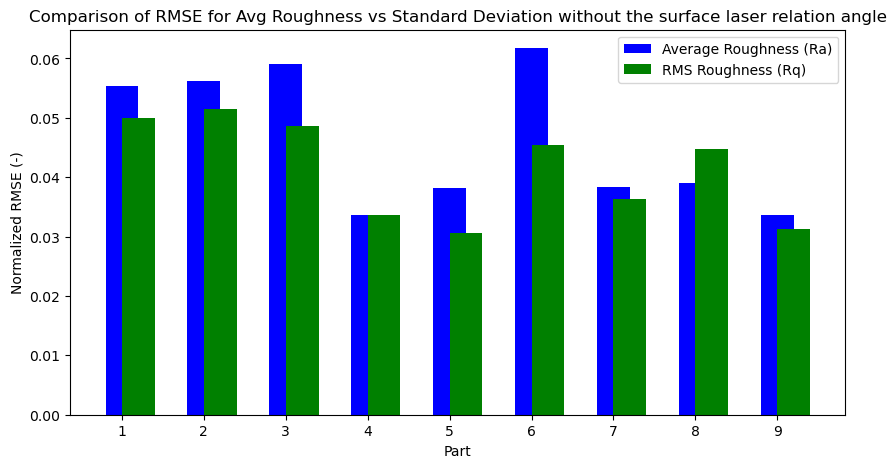

In [2]:
# Given RMSE values for Average Roughness Ra and RMS Roughness Rq
rmse_Ra = [
    0.05535751068583342344,
    0.05621088200297531812,
    0.05903372705712724849,
    0.03360851566065260060,
    0.03811101326618339391,
    0.06175316124826145392,
    0.03829636787587462760,
    0.03897285681601348611,
    0.03358577491912027174
]

rmse_Rq = [
    0.04998967524692213976,
    0.05142897000677788127,
    0.04862856869446770952,
    0.03366485288037864704,
    0.03062918908999314252,
    0.04545794024417101203,
    0.03639037666506828722,
    0.04483115037422188975,
    0.03119560915973557808
]

parts = list(range(1, 10))  # Parts 1 through 9

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(parts, rmse_Ra, color='blue', width=0.4, label='Average Roughness (Ra)', align='center')
plt.bar(parts, rmse_Rq, color='green', width=0.4, label='RMS Roughness (Rq)', align='edge')

plt.xlabel('Part')
plt.ylabel('Normalized RMSE (-)')
plt.title('Comparison of RMSE for Avg Roughness vs Standard Deviation without the surface laser relation angle')
plt.xticks(parts)
plt.legend()
plt.show()


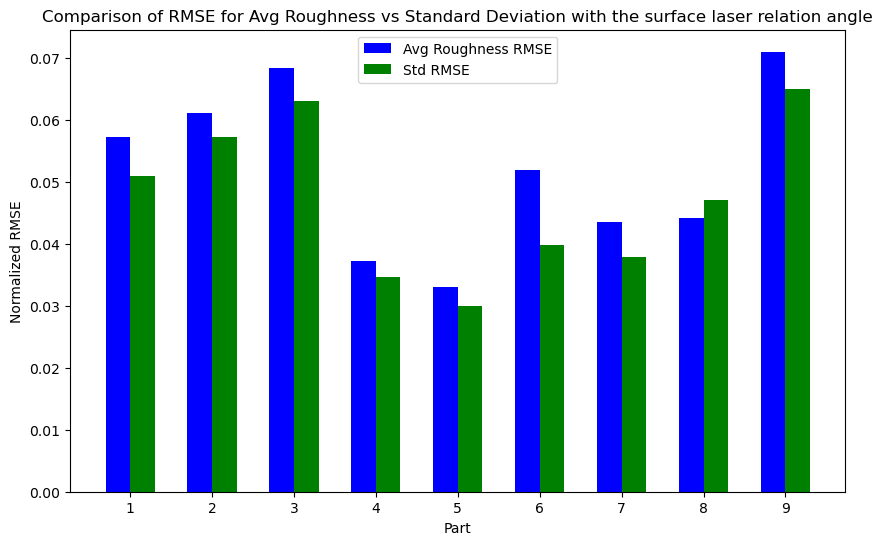

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE data for average roughness and standard deviation
avg_roughness_rmse = [0.05720, 0.06102, 0.06828, 0.03716, 0.03301, 0.05188, 0.04355, 0.04420, 0.07098]
std_rmse = [0.05086, 0.05721, 0.06309, 0.03468, 0.02999, 0.03974, 0.03792, 0.04705, 0.06502]


parts = np.arange(1, 10)  # Parts 1 through 9

# Create the plot
plt.figure(figsize=(10, 6))

plt.bar(parts - 0.15, avg_roughness_rmse, width=0.3, label='Avg Roughness RMSE', color='blue')
plt.bar(parts + 0.15, std_rmse, width=0.3, label='Std RMSE', color='green')

plt.xlabel('Part')
plt.ylabel('Normalized RMSE')
plt.title('Comparison of RMSE for Avg Roughness vs Standard Deviation with the surface laser relation angle')
plt.xticks(parts)
plt.legend()

plt.show()


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each model
parts = np.arange(1, 10)  # Parts 1-9

gb_rmse = np.array([
    0.05535751068583342344, 0.05621088200297531812, 0.05903372705712724849,
    0.03360851566065260060, 0.03811101326618339391, 0.06175316124826145392,
    0.03829636787587462760, 0.03897285681601348611, 0.03358577491912027174
])

lr_rmse = np.array([
    0.21376859795699124089, 0.21770653927582195308, 0.20958873559513954699,
    0.23207657400423026273, 0.22856187566164515301, 0.21844991651663173138,
    0.23880484918053898613, 0.24155388242048572711, 0.22882665140691635375
])

rf_rmse = np.array([
    0.05538950520423948504, 0.05828455454819047449, 0.04755996781387312328,
    0.02234458812206165101, 0.03645258327677988047, 0.06551394039419454474,
    0.03484804253461668694, 0.03324595343325215807, 0.03479719645917151577
])

# Normalize RMSE scores for better comparison
max_rmse = np.max([gb_rmse, lr_rmse, rf_rmse])
gb_rmse_norm = gb_rmse / max_rmse
lr_rmse_norm = lr_rmse / max_rmse
rf_rmse_norm = rf_rmse / max_rmse


# Plotting with the adjusted order: LR, RF, GB
plt.figure(figsize=(10, 6))

# Set position of bar on X axis with the new order
r1 = np.arange(len(lr_rmse_norm))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, lr_rmse_norm, color='r', width=bar_width, edgecolor='grey', label='Linear Regression')
plt.bar(r2, rf_rmse_norm, color='g', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r3, gb_rmse_norm, color='b', width=bar_width, edgecolor='grey', label='Gradient Boosting')

# Add xticks on the middle of the group bars
plt.xlabel('Folds', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(lr_rmse_norm))], ['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5', 'Part 6', 'Part 7', 'Part 8', 'Part 9'])
plt.ylabel('Normalized RMSE (-)', fontweight='bold')
plt.title('Comparison of RMSE for Different Models considering Ra')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()

plt.show()

NameError: name 'bar_width' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_selected[['part', 'x', 'y', 'x_y_angle_sin', 'x_y_angle_cos', 'z_angle','laser_relation_angle']]
y = df_selected['sq_2d_mm']

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor

part_list = df_selected['part'].unique()

# Dictionary to store results for each part
results = {}

# Loop through each unique part for cross-validation
for part in part_list:
    # Split the data into training and testing sets based on the part
    X_train = X[X['part'] != part].drop('part', axis=1)
    y_train = y[X['part'] != part]
    
    X_test = X[X['part'] == part].drop('part', axis=1)
    y_test = y[X['part'] == part]
    
    # Train the Random Forest Regressor
    rf_model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred_rf = rf_model.predict(X_test)
    
    # Calculate mean squared error and R^2 score for Random Forest Regressor
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    # Calculate residuals
    residuals = y_test - y_pred_rf

    # Store results for the current part
    results[part] = {
        'RMSE': np.sqrt(mse_rf),
        'R2': r2_rf,
        'Actual': y_test.tolist(),
        'Predicted': y_pred_rf.tolist(),
        'Residuals': residuals.tolist()
    }

# Display MSE and R^2 for each part
for part in results:
    print(f"Part {part}: RMSE = {results[part]['RMSE']:.20f}, R^2 = {results[part]['R2']:.3f}")


In [ ]:
import pandas as pd

# Assuming df_selected is your original DataFrame
# and the previous code for Gradient Boosting Regressor has been executed

# Initialize an empty list to store residuals
residuals_Ra = []

# Loop through each unique part, calculate residuals, and append them to the residuals_y list
for part in part_list:
    # Retrieve actual and predicted values
    actual_values = results[part]['Actual']
    predicted_values = results[part]['Predicted']
    
    # Calculate residuals for the current part
    residuals_current_part = np.array(actual_values) - np.array(predicted_values)
    
    # Append residuals to the residuals_x list
    residuals_Ra.extend(residuals_current_part)

# Add the residuals as a new column in the original DataFrame
df_selected['residuals_Ra'] = residuals_Ra

# Now, df_selected contains a new column 'residuals_x' with the residuals of the 'sq_y_mm' predictions
df_selected

In [ ]:
all_residuals = []
for part in results:
    part_data = df_selected[df_selected['part'] == part]
    residuals = results[part]['Residuals']
    part_data['Residual'] = residuals
    all_residuals.append(part_data)

df_with_residuals = pd.concat(all_residuals)

Q1 = df_with_residuals['Residual'].quantile(0.25)
Q3 = df_with_residuals['Residual'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_with_residuals['Residual'] < (Q1 - 1.5 * IQR)) | (df_with_residuals['Residual'] > (Q3 + 1.5 * IQR))
df_cleaned = df_with_residuals[~outlier_mask]

filtered_df_of_outliers_2 = df_with_residuals[outlier_mask]
filtered_df_of_outliers_2

In [ ]:
# Creating a combined DataFrame with an additional column to distinguish between the two DataFrames
filtered_df_of_outliers_1['Source'] = 'DF1'
filtered_df_of_outliers_2['Source'] = 'DF2'

combined_df = pd.concat([filtered_df_of_outliers_1[['part', 'rib', 'sur', 'x', 'y', 'z_angle','laser_relation_angle','Average Roughness (Ra)', 'sq_2d_mm', 'Source']],
                         filtered_df_of_outliers_2[['part', 'rib', 'sur', 'x', 'y', 'z_angle','laser_relation_angle', 'Average Roughness (Ra)', 'sq_2d_mm', 'Source']]])


# Plotting for 'part'
sns.countplot(data=combined_df, x='part', hue='Source')
plt.title('Comparison of part Counts in DF1 and DF2')
plt.show()

# Plotting for 'rib'
sns.countplot(data=combined_df, x='rib', hue='Source')
plt.title('Comparison of Rib Counts in DF1 and DF2')
plt.show()

# Plotting for 'sur'
sns.countplot(data=combined_df, x='sur', hue='Source')
plt.title('Comparison of Surface Counts in DF1 and DF2')
plt.show()

# Plotting for 'Average Roughness (Ra)'
plt.figure(figsize=(10, 6))
sns.histplot(combined_df, x='Average Roughness (Ra)', hue='Source', kde=True)
plt.title('Distribution of Average Roughness (Ra) in DF1 and DF2')
plt.show()

# Plotting for 'sq_2d_mm'
plt.figure(figsize=(10, 6))
sns.histplot(combined_df, x='sq_2d_mm', hue='Source', kde=True)
plt.title('Distribution of sq_2d_mm in DF1 and DF2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'filtered_df_of_outliers_1' and 'filtered_df_of_outliers_2' are already defined

# Function to compute "xy angle" if it's not directly provided
def compute_xy_angle(df):
    # Placeholder calculation for "xy angle" - adjust as needed
    df['xy_angle'] = df.apply(lambda row: (row['x_y_angle_sin']**2 + row['x_y_angle_cos']**2)**0.5, axis=1)
    return df

# Pre-process both DataFrames
filtered_df_of_outliers_1 = compute_xy_angle(filtered_df_of_outliers_1)
filtered_df_of_outliers_2 = compute_xy_angle(filtered_df_of_outliers_2)

# Identify all unique z angles across both DataFrames
all_z_angles = pd.concat([filtered_df_of_outliers_1['z_angle'], filtered_df_of_outliers_2['z_angle']]).unique()

# Plotting
for z_angle in all_z_angles:
    plt.figure(figsize=(10, 6))
    
    # Filter data for the current z_angle
    specific_df_1 = filtered_df_of_outliers_1[filtered_df_of_outliers_1['z_angle'] == z_angle]
    specific_df_2 = filtered_df_of_outliers_2[filtered_df_of_outliers_2['z_angle'] == z_angle]
    
    # Plot data from filtered_df_of_outliers_1
    sns.scatterplot(x='xy_angle', y='Average Roughness (Ra)', data=specific_df_1, color='blue', label='DataFrame 1')
    
    # Plot data from filtered_df_of_outliers_2
    sns.scatterplot(x='xy_angle', y='Average Roughness (Ra)', data=specific_df_2, color='red', label='DataFrame 2')
    
    plt.title(f'Comparison of Avg Roughness vs. xy angle for z angle = {z_angle}')
    plt.xlabel('xy angle')
    plt.ylabel('Average Roughness (Ra)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:


# Columns to compare
columns_to_compare = ['part', 'rib', 'sur', 'x', 'y']

# Filter both dataframes to only include the specified columns for comparison
df1_filtered = filtered_df_of_outliers_1[columns_to_compare]
df2_filtered = filtered_df_of_outliers_2[columns_to_compare]

# Find common rows based on specified columns
common_rows_specific_cols = pd.merge(df1_filtered, df2_filtered, on=columns_to_compare, how='inner')

# Calculate the number of common rows
num_common_rows_specific_cols = len(common_rows_specific_cols)
num_common_rows_specific_cols


In [ ]:
import plotly.graph_objects as go

# Creating figure
fig = go.Figure()

# Adding traces
fig.add_trace(go.Scatter(x=filtered_df_of_outliers_1['Average Roughness (Ra)'], y=filtered_df_of_outliers_1['sq_2d_mm'], mode='lines', name='Outliers Set 1', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=filtered_df_of_outliers_2['Average Roughness (Ra)'], y=filtered_df_of_outliers_2['sq_2d_mm'], mode='lines', name='Outliers Set 2', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_selected['Average Roughness (Ra)'], y=df_selected['sq_2d_mm'], mode='lines', name='Selected Data', line=dict(color='red')))

# Updating layout
fig.update_layout(title='Interactive Line Plot between Average Roughness (Ra) and sq_2d_mm',
                   xaxis_title='Average Roughness (Ra)',
                   yaxis_title='sq_2d_mm')

fig.show()
